In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import tensorflow
import os
from skimage import io,color
import cv2
import glob
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.models import Sequential,load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix

In [3]:
class UrduChar():
    def __init__(self,dir="/kaggle/input/trainurduchar/"):
        self.dir = dir
        self.encoder = LabelEncoder()
    def load_data(self,path= "train"):
        x= []
        y = []
        for f1 in os.listdir(os.path.join(self.dir,path)):
            img = cv2.imread(os.path.join(self.dir,path,f1),cv2.IMREAD_GRAYSCALE)
            x.append(img),y.append(f1.split(" ")[0])
        x = np.array(x)    
        y = np.array(y)
        return x,y 
    def preprocessing(self,x,y):
        y = self.encoder.fit_transform(y)
        y = to_categorical(y)
        x = x.astype("float")/255
        x = x.reshape(x.shape[0],28,28,1)
        return x,y
    def model(self):
        inpx = (28,28,1)
        inpx = Input(shape=inpx)
        layer1 = Conv2D(100,kernel_size=(3,3),activation="relu")(inpx)
        layer2 = Conv2D(100,kernel_size = (3,3),activation="relu")(layer1)
        layer8 = Conv2D(100,kernel_size = (3,3),activation="relu")(layer2)
        layer3 = MaxPooling2D(pool_size= (3,3))(layer8)
        layer4 = Flatten()(layer3)
        layer5 = Dense(600,activation="relu")(layer4)
        layer6 = Dense(600,activation="sigmoid")(layer5)
        layer7 = Dense(36,activation="softmax")(layer6)
        model = Model([inpx],layer7)
        model.compile(optimizer = "adam",loss = tensorflow.keras.losses.categorical_crossentropy,metrics= ["accuracy"])
        return model
    

In [4]:
uc = UrduChar()
x,y = uc.load_data()
x,y = uc.preprocessing(x,y)
model = uc.model()
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.3,random_state=20)


2023-01-12 06:43:46.181131: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
hist = model.fit(x_train,y_train,batch_size = 1000,epochs = 30)

2023-01-12 06:43:46.557698: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
11/11 [==============================] - 74s 6s/step - loss: 3.4412 - accuracy: 0.0824
Epoch 2/30
11/11 [==============================] - 72s 7s/step - loss: 2.3856 - accuracy: 0.3179
Epoch 3/30
11/11 [==============================] - 74s 7s/step - loss: 1.9296 - accuracy: 0.4577
Epoch 4/30
11/11 [==============================] - 72s 7s/step - loss: 1.6605 - accuracy: 0.5285
Epoch 5/30
11/11 [==============================] - 72s 7s/step - loss: 1.4710 - accuracy: 0.5768
Epoch 6/30
11/11 [==============================] - 73s 7s/step - loss: 1.2951 - accuracy: 0.6305
Epoch 7/30
11/11 [==============================] - 73s 7s/step - loss: 1.1415 - accuracy: 0.6752
Epoch 8/30
11/11 [==============================] - 72s 6s/step - loss: 1.0161 - accuracy: 0.7109
Epoch 9/30
11/11 [==============================] - 72s 7s/step - loss: 0.9023 - accuracy: 0.7398
Epoch 10/30
11/11 [==============================] - 72s 7s/step - loss: 0.7847 - accuracy: 0.7798
Epoch 11/30
11/11 [

In [6]:
pred = model.predict(x_test)
loss,acc = model.evaluate(x_test,y_test, verbose=0)
print("         Using CNN           ")
print(f"loss on testing is {loss}\naccuracy on testing {acc}")

         Using CNN           
loss on testing is 0.40319544076919556
accuracy on testing 0.8634259104728699


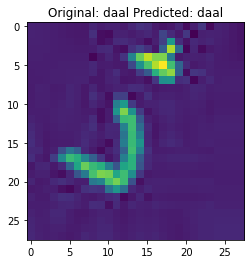

In [7]:
def decode(data):
    data =  np.argmax(y_test,axis=1)
    data = uc.encoder.inverse_transform(data)
    return data
def plot_image(img_idx):
    if img_idx<y_test.shape[0]:
        plt.imshow(x_test[img_idx])
        plt.title(f"Original: {decode(y_test)[img_idx]} Predicted: {decode(pred)[img_idx]}")
        plt.show()
    else:
        print(img_idx," is out of data")
plot_image(500)

Confusion matrix, without normalization
(36, 36)


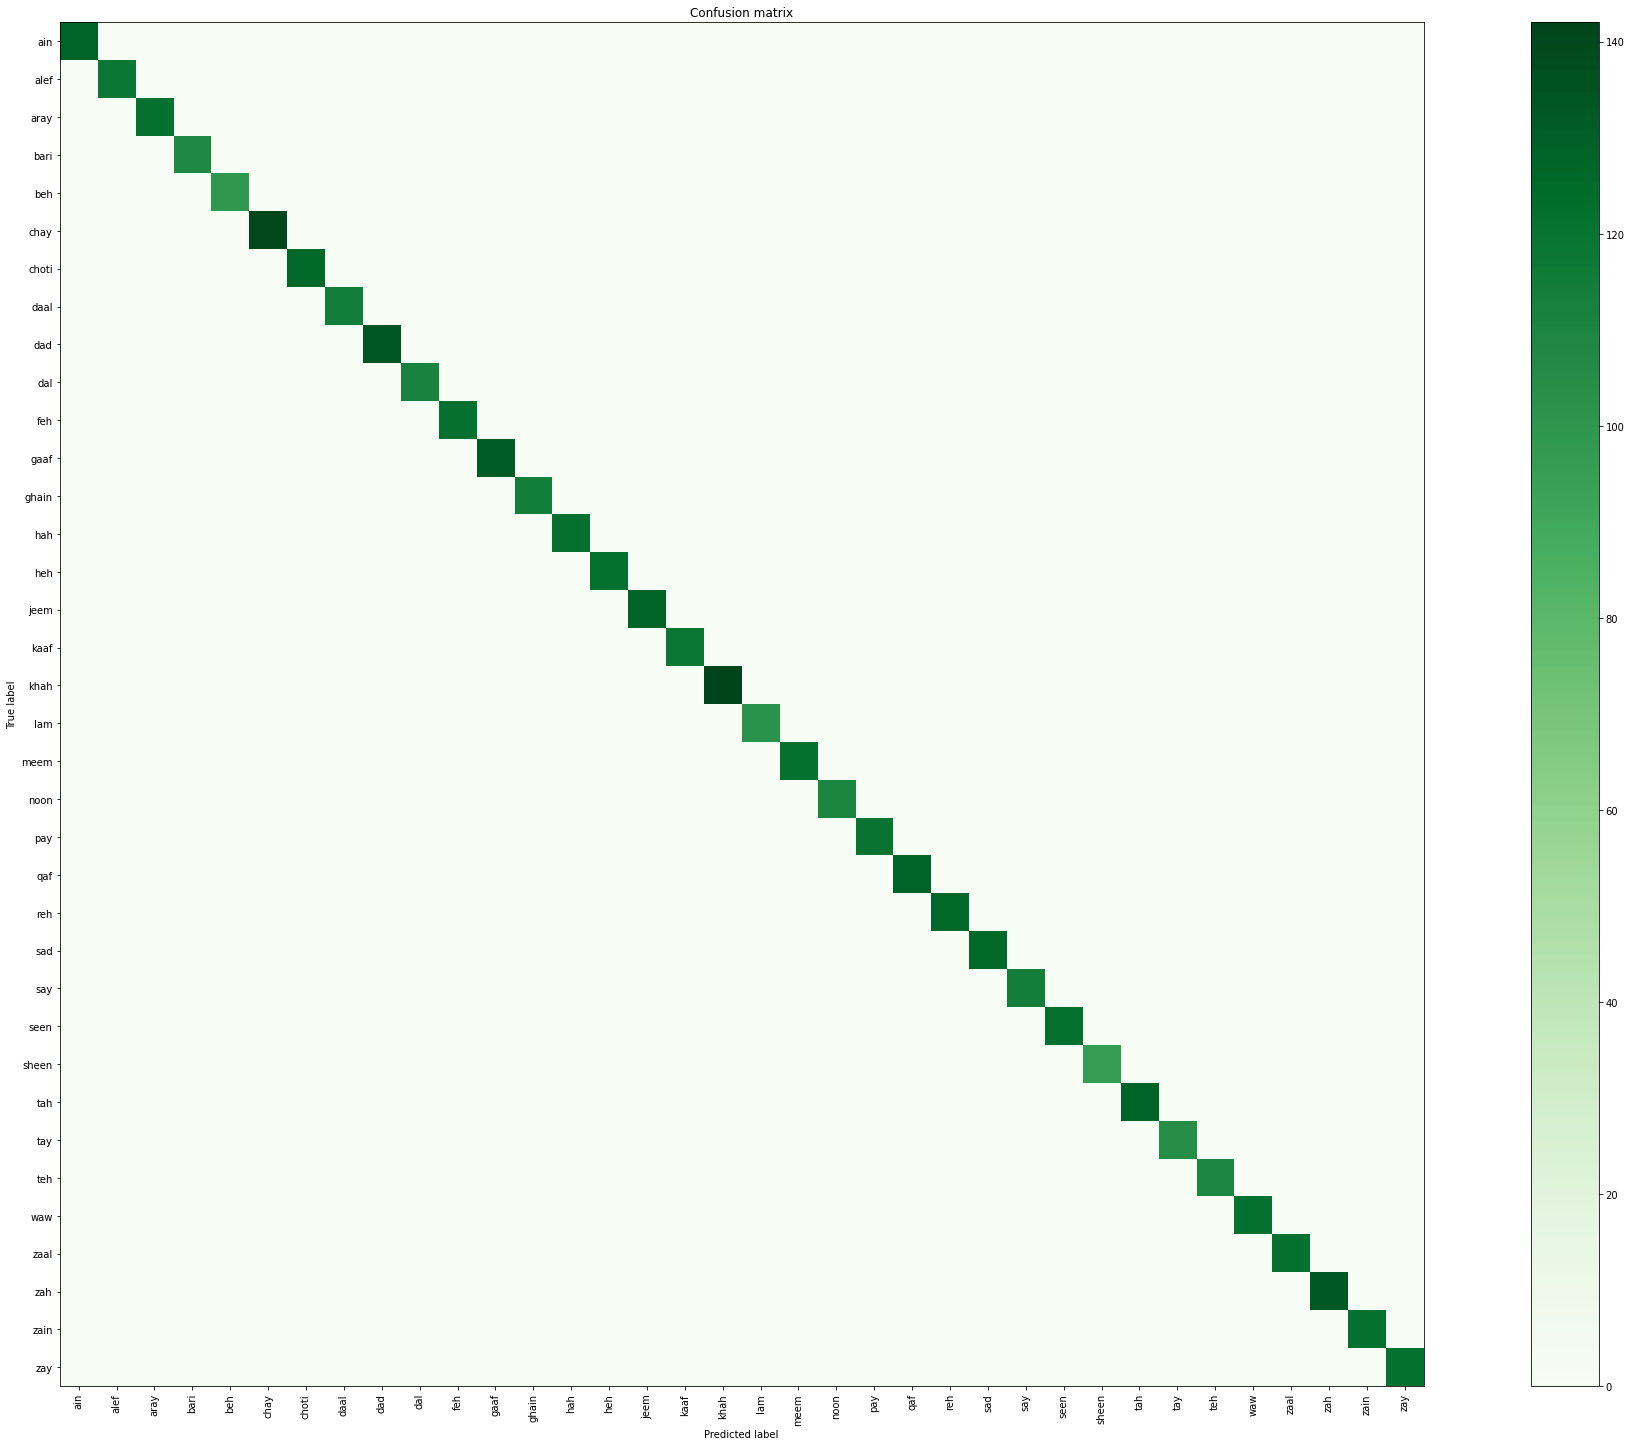

In [8]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(36)
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(decode(y_test),decode(pred))
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm.shape)
plt.rcParams["figure.figsize"]=(30,20)
plt.figure()
plot_confusion_matrix(cm,sorted(set(decode(pred) ) ))

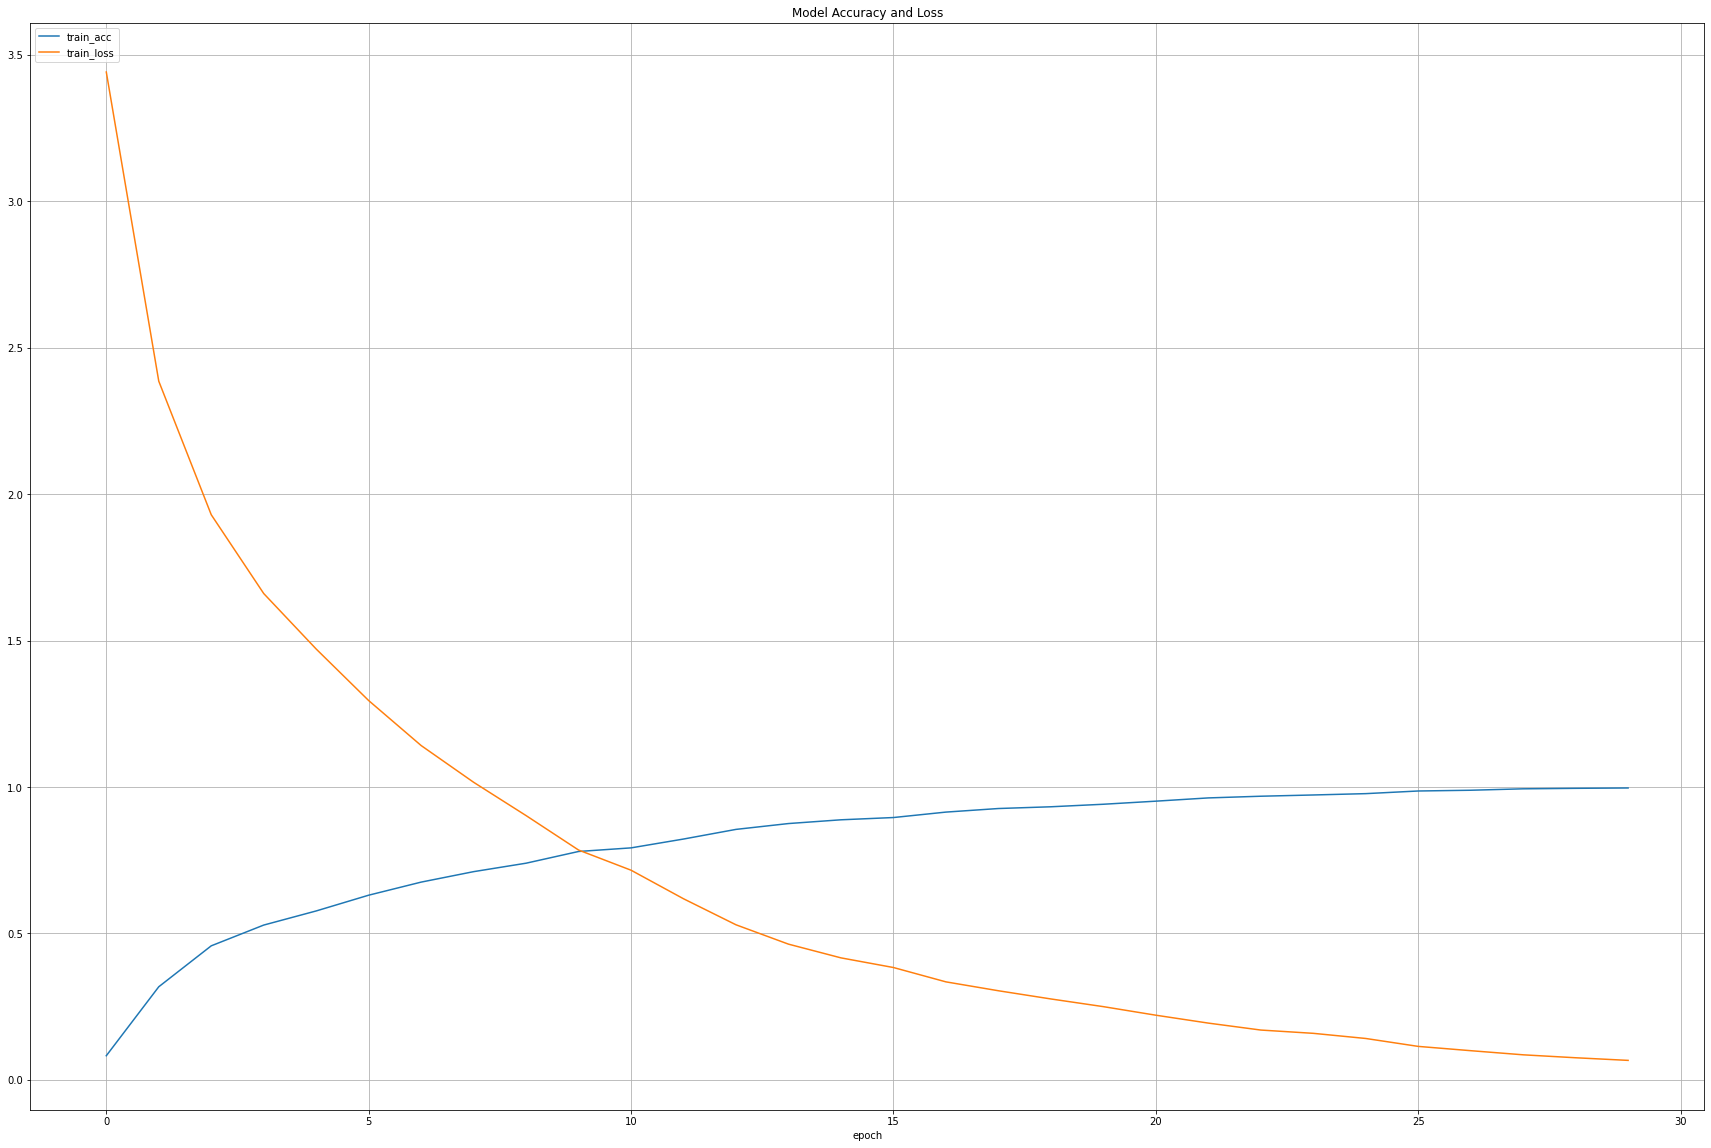

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('epoch')
plt.legend(['train_acc', 'train_loss'], loc='upper left')
plt.grid()
plt.show()